### <span style="color:red">Lorenzo Albano, 967738</span>

# <span style="color:red"> ESERCIZIO 10.1 e 10.2:</span> Problema del commesso viaggiatore: librerie MPI per il calcolo parallelo

In questa esercitazione si vuole risolvere il problema del commesso viaggiatore (vedasi Esercitazione 09) sfruttando il calcolo parallelo. Si è quindi installata la **libreria MPI** (Message Passing Interface) al fine di eseguire _contemporaneamente_ diverse ricerche della soluzione (miglior percorso) con l'algoritmo genetico.

Il programma prende in input il numero di Cromosomi (individui della popolazione) il numero di Generazioni (quante volte faccio evolvere la popolazione) ed il numero di Migrazioni. Quest'ultimo valore indica quante volte avviene uno scambio di informazione (di individui) tra i vari processi (continenti). La parte intera del rapporto tra numero di Generazioni e numero di Migrazioni fornisce il numero di "Generazioni statiche", ovvero che non si spostano fra continenti.

Vengono inoltre dichiarati due generatori di numeri casuali, il primo inizializzato con input dipendenti dal rank (ogni processo ha la sua successione di numeri casuali diversa), il secondo ha input comuni per ogni processo, da utilizzare nei rispettivi casi.

Ad ogni migrazione, ogni continente invierà il suo miglior individuo ad un altro estratto casualmente, ricevendone quindi uno a sua volta (funzione newSchedule). Concluse le generazioni richieste, tutti i migliori percorsi di ogni continente sono inviati nel primo, che quindi - dopo algoritmo di sort - potrà decretare il miglior percorso globale.

Per commenti sui metodi delle classi Territorio, Cromosoma e Popolazione - in particolare per i metodi di mutazione e quello di crossover - si faccia riferimento a quanto descritto nella esercitazione 09.

Per testare in modo pratico il programma realizzato vengono passate in input le coordinate delle 50 capitali degli Stati Uniti d'America: l'algoritmo genetico, tramite il calcolo parallelo, troverà il percorso più breve per visitarle tutte una ed una sola volta, ritornando alla città di partenza!

## <span style="color:blue"> GRAFICO A) </span> TSP: capitali Stati Uniti d'America

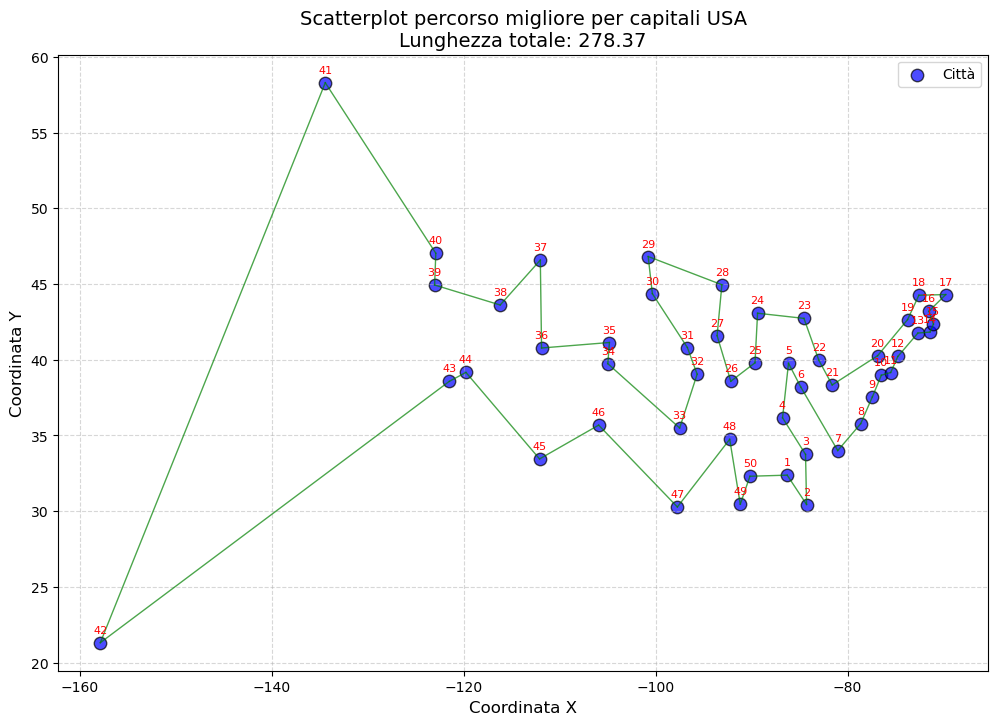

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Carica i dati dal file (2 colonne: x e y delle città, nell'ordine in cui vanno legate)
data = np.loadtxt("2.USACapitals.coordinate.out")

# Estrai le colonne x e y
x = data[:, 0]
y = data[:, 1]

# Inizializza la lunghezza totale del percorso a zero
total_length = 0.0

# Crea una figura quadrata
plt.figure(figsize=(12, 8))

# Crea lo scatterplot con uno stile migliorato
plt.scatter(x, y, s=80, c='blue', edgecolors='black', alpha=0.7, label='Città')

# Aggiungi numeri ai punti in ordine di come sono stati collegati
for i, (xi, yi) in enumerate(zip(x, y)):
    offset = 0.5
    plt.text(xi, yi+offset, str(i+1), color='red', ha='center', va='bottom', fontsize=8)

# Aggiungi segmenti che uniscono i punti in ordine
for i in range(len(x) - 1):
    distance = np.sqrt((x[i + 1] - x[i])**2 + (y[i + 1] - y[i])**2)
    total_length += distance
    plt.plot([x[i], x[i + 1]], [y[i], y[i + 1]], '-', color='green', linewidth=1, alpha=0.7)

# Traccia il segmento che collega l'ultimo punto al primo punto
distance = np.sqrt((x[-1] - x[0])**2 + (y[-1] - y[0])**2)
total_length += distance
plt.plot([x[-1], x[0]], [y[-1], y[0]], '-', color='green', linewidth=1, alpha=0.7)

# Aggiungi etichette agli assi
plt.xlabel("Coordinata X", fontsize=12)
plt.ylabel("Coordinata Y", fontsize=12)

# Aggiungi un titolo al grafico con la lunghezza totale del percorso
plt.title(f"Scatterplot percorso migliore per capitali USA\nLunghezza totale: {total_length:.2f}", fontsize=14)

# Mostra una griglia di sfondo
plt.grid(True, linestyle='--', alpha=0.5)

# Mostra la legenda
plt.legend()

# Mostra il grafico
plt.show()